# Lab: Regression Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

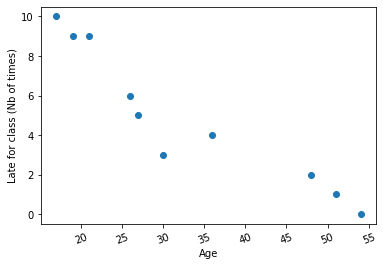

In [4]:
plt.scatter(student_data['X'],student_data['Y'])
plt.xlabel('Age')
plt.ylabel('Late for class (Nb of times)')
plt.xticks(fontsize=10,rotation=20)
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
#It seems the younger the student is, the more numerous times they are late.
#The incidence of being late is decreasing as the student are more advanced in age.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
#correlation:
alfscorr=student_data['X'].corr(student_data['Y'])
alfscorr

#There is a strong linear relationship in this dataset between 'Age' and 'Late for school'. 
#In this case it a negative linear correlation.

-0.9391626886887122

In [6]:
#covariance:
covcalc=np.cov(student_data['X'], student_data['Y'])
covcalc

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [40]:
# Regression model :
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [8]:
numericData = student_data[['X']]
Y = pd.DataFrame(data=student_data, columns=['Y'])
transformer = StandardScaler().fit(student_data[['X']])
scaled_x = transformer.transform(student_data[['X']])
classification = LogisticRegression(random_state=0,solver='liblinear').fit(scaled_x, student_data['Y'])


In [13]:
#OLS for simple linear regression
Y = student_data['Y']
X = student_data['X']
X = sm.add_constant(X)  
model =sm.OLS(Y,X)
results = model.fit()
results.params


const    12.888803
X        -0.242821
dtype: float64

Plot your regression model on your scatter plot.

In [14]:
plt.scatter(results.params)
plt.xlabel('Age')
plt.ylabel('Late for class (Nb of times)')
plt.xticks(fontsize=10,rotation=20)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [36]:
cars= pd.read_csv('vehicles.csv')
cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [37]:
#Calculate the correlations
selectedcol = cars[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']] #selecting the columns
corrMatrix = selectedcol.corr() #computing the correlations with a correlation matrix
corrMatrix

# Fuel Cost/Year and Fuel Barrels/Year shows a strong correlation (0,92)
# Fuel Cost/Year and Cylinders also show a good correlation (0,74)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
#try with OLS ???



In [42]:
numericData = cars[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
Y = pd.DataFrame(data=cars, columns=['CO2 Emission Grams/Mile'])
transformer = StandardScaler().fit(cars[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])
scaled_x = transformer.transform(cars[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']])
classification = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(scaled_x, cars['CO2 Emission Grams/Mile'])


ValueError: Unknown label type: 'continuous'

LogisticRegression(random_state=0, solver='liblinear')

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

In [ ]:
#X : people I invite ; Y: people who attends

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [15]:
data ={'X_invite':[1,3,4,6,8,9,11,14],'Y_attends':[1,2,4,4,5,7,8,13]}
Myparties = pd.DataFrame.from_dict(data)
Myparties

,X_invite,Y_attends
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

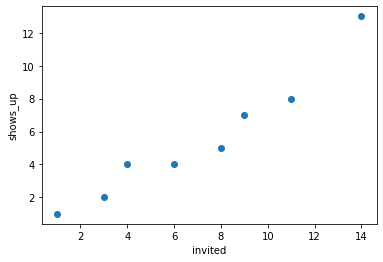

In [19]:
plt.scatter(x=Myparties['X_invite'], y=Myparties['Y_attends'])
plt.xlabel('invited')
plt.ylabel('shows_up')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
#It looks like there is linear regression, and a correlation between the number of people that I invite and the people who shows up


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [32]:
data2 ={'X_in':[1,3,6,8],'Y_att':[1,2,4,5]}
Myparties2 = pd.DataFrame.from_dict(data2)
Myparties2


,X_in,Y_att
0,1,1
1,3,2
2,6,4
3,8,5


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

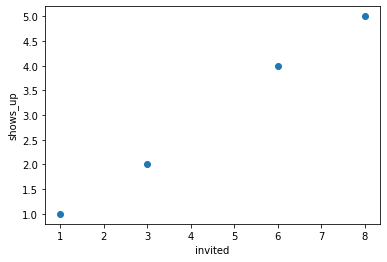

In [33]:
#
plt.scatter(x=Myparties2['X_in'], y=Myparties2['Y_att'])
plt.xlabel('invited')
plt.ylabel('shows_up')
plt.show()